# NYC Airbnb Data Analysis: Comprehensive Market Insights


In [1]:
#bib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Data overview and cleaning 

In [2]:
#load data
df = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
# Basic info about the dataset
def explore_dataset(df):
    """Comprehensive dataset exploration"""
    print(f"Dataset shape: {df.shape}")
    print(f"\nMissing values:")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percent
    })
    print(missing_df[missing_df['Missing Count'] > 0])
    
    return missing_df


explore_dataset(df)

Dataset shape: (48895, 16)

Missing values:
                   Missing Count  Missing Percentage
name                          16            0.032723
host_name                     21            0.042949
last_review                10052           20.558339
reviews_per_month          10052           20.558339


,Missing Count,Missing Percentage
id,0,0.000000
name,16,0.032723
host_id,0,0.000000
host_name,21,0.042949
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000


In [4]:
# Data cleaning function
def clean_data(df):
    """Clean and prepare data for analysis"""
    df_clean = df.copy()
    
    # Handle missing values
    df_clean['name'].fillna('No Name', inplace=True)
    df_clean['host_name'].fillna('No Host Name', inplace=True)
    
    # Remove extreme outliers in price (above 99.5th percentile)
    price_threshold = df_clean['price'].quantile(0.995)
    df_clean = df_clean[df_clean['price'] <= price_threshold]
    
    # Remove listings with price = 0
    df_clean = df_clean[df_clean['price'] > 0]
    
    # Convert last_review to datetime
    df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])
    
    return df_clean

#update
df_clean = clean_data(df)
df_clean.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## Price distibution analysis

In [5]:
def analyze_price_distribution(df):
    """Analyze price distribution across different dimensions"""
    
    # Overall price distribution
    plt.figure(figsize=(30, 20))
    
    # Subplot 1: Price distribution histogram
    plt.subplot(2, 3, 1)
    sns.histplot(data=df, x='price', bins=50, kde=True, color='skyblue')
    plt.title('Price Distribution (All Listings)', fontweight='bold')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
    
    # Subplot 2: Price distribution by room type
    plt.subplot(2, 3, 2)
    sns.boxplot(data=df, x='room_type', y='price', palette='viridis')
    plt.title('Price Distribution by Room Type', fontweight='bold')
    plt.xticks(rotation=45)
    
    # Subplot 3: Price distribution by neighbourhood group
    plt.subplot(2, 3, 3)
    sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='Set2')
    plt.title('Price Distribution by Borough', fontweight='bold')
    plt.xticks(rotation=45)
    
    # Subplot 4: Price vs minimum nights
    plt.subplot(2, 3, 4)
    sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.6, color='coral')
    plt.title('Price vs Minimum Nights', fontweight='bold')
    plt.xlabel('Minimum Nights')
    plt.ylabel('Price ($)')
    
    # Subplot 5: Price heatmap by borough and room type
    plt.subplot(2, 3, 5)
    price_pivot = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()
    sns.heatmap(price_pivot, annot=True, cmap='YlOrRd', fmt='.0f')
    plt.title('Average Price Heatmap', fontweight='bold')
    plt.xlabel('Room Type')
    plt.ylabel('Borough')
    
    # Subplot 6: Price distribution (log scale)
    plt.subplot(2, 3, 6)
    sns.histplot(data=df, x='price', bins=50, kde=True, log_scale=True, color='lightgreen')
    plt.title('Price Distribution (Log Scale)', fontweight='bold')
    plt.xlabel('Price ($) - Log Scale')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Price statistics
    print("\n📈 Price Statistics Summary:")
    print(f"Mean price: ${df['price'].mean():.2f}")
    print(f"Median price: ${df['price'].median():.2f}")
    print(f"Standard deviation: ${df['price'].std():.2f}")
    print(f"Price range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")

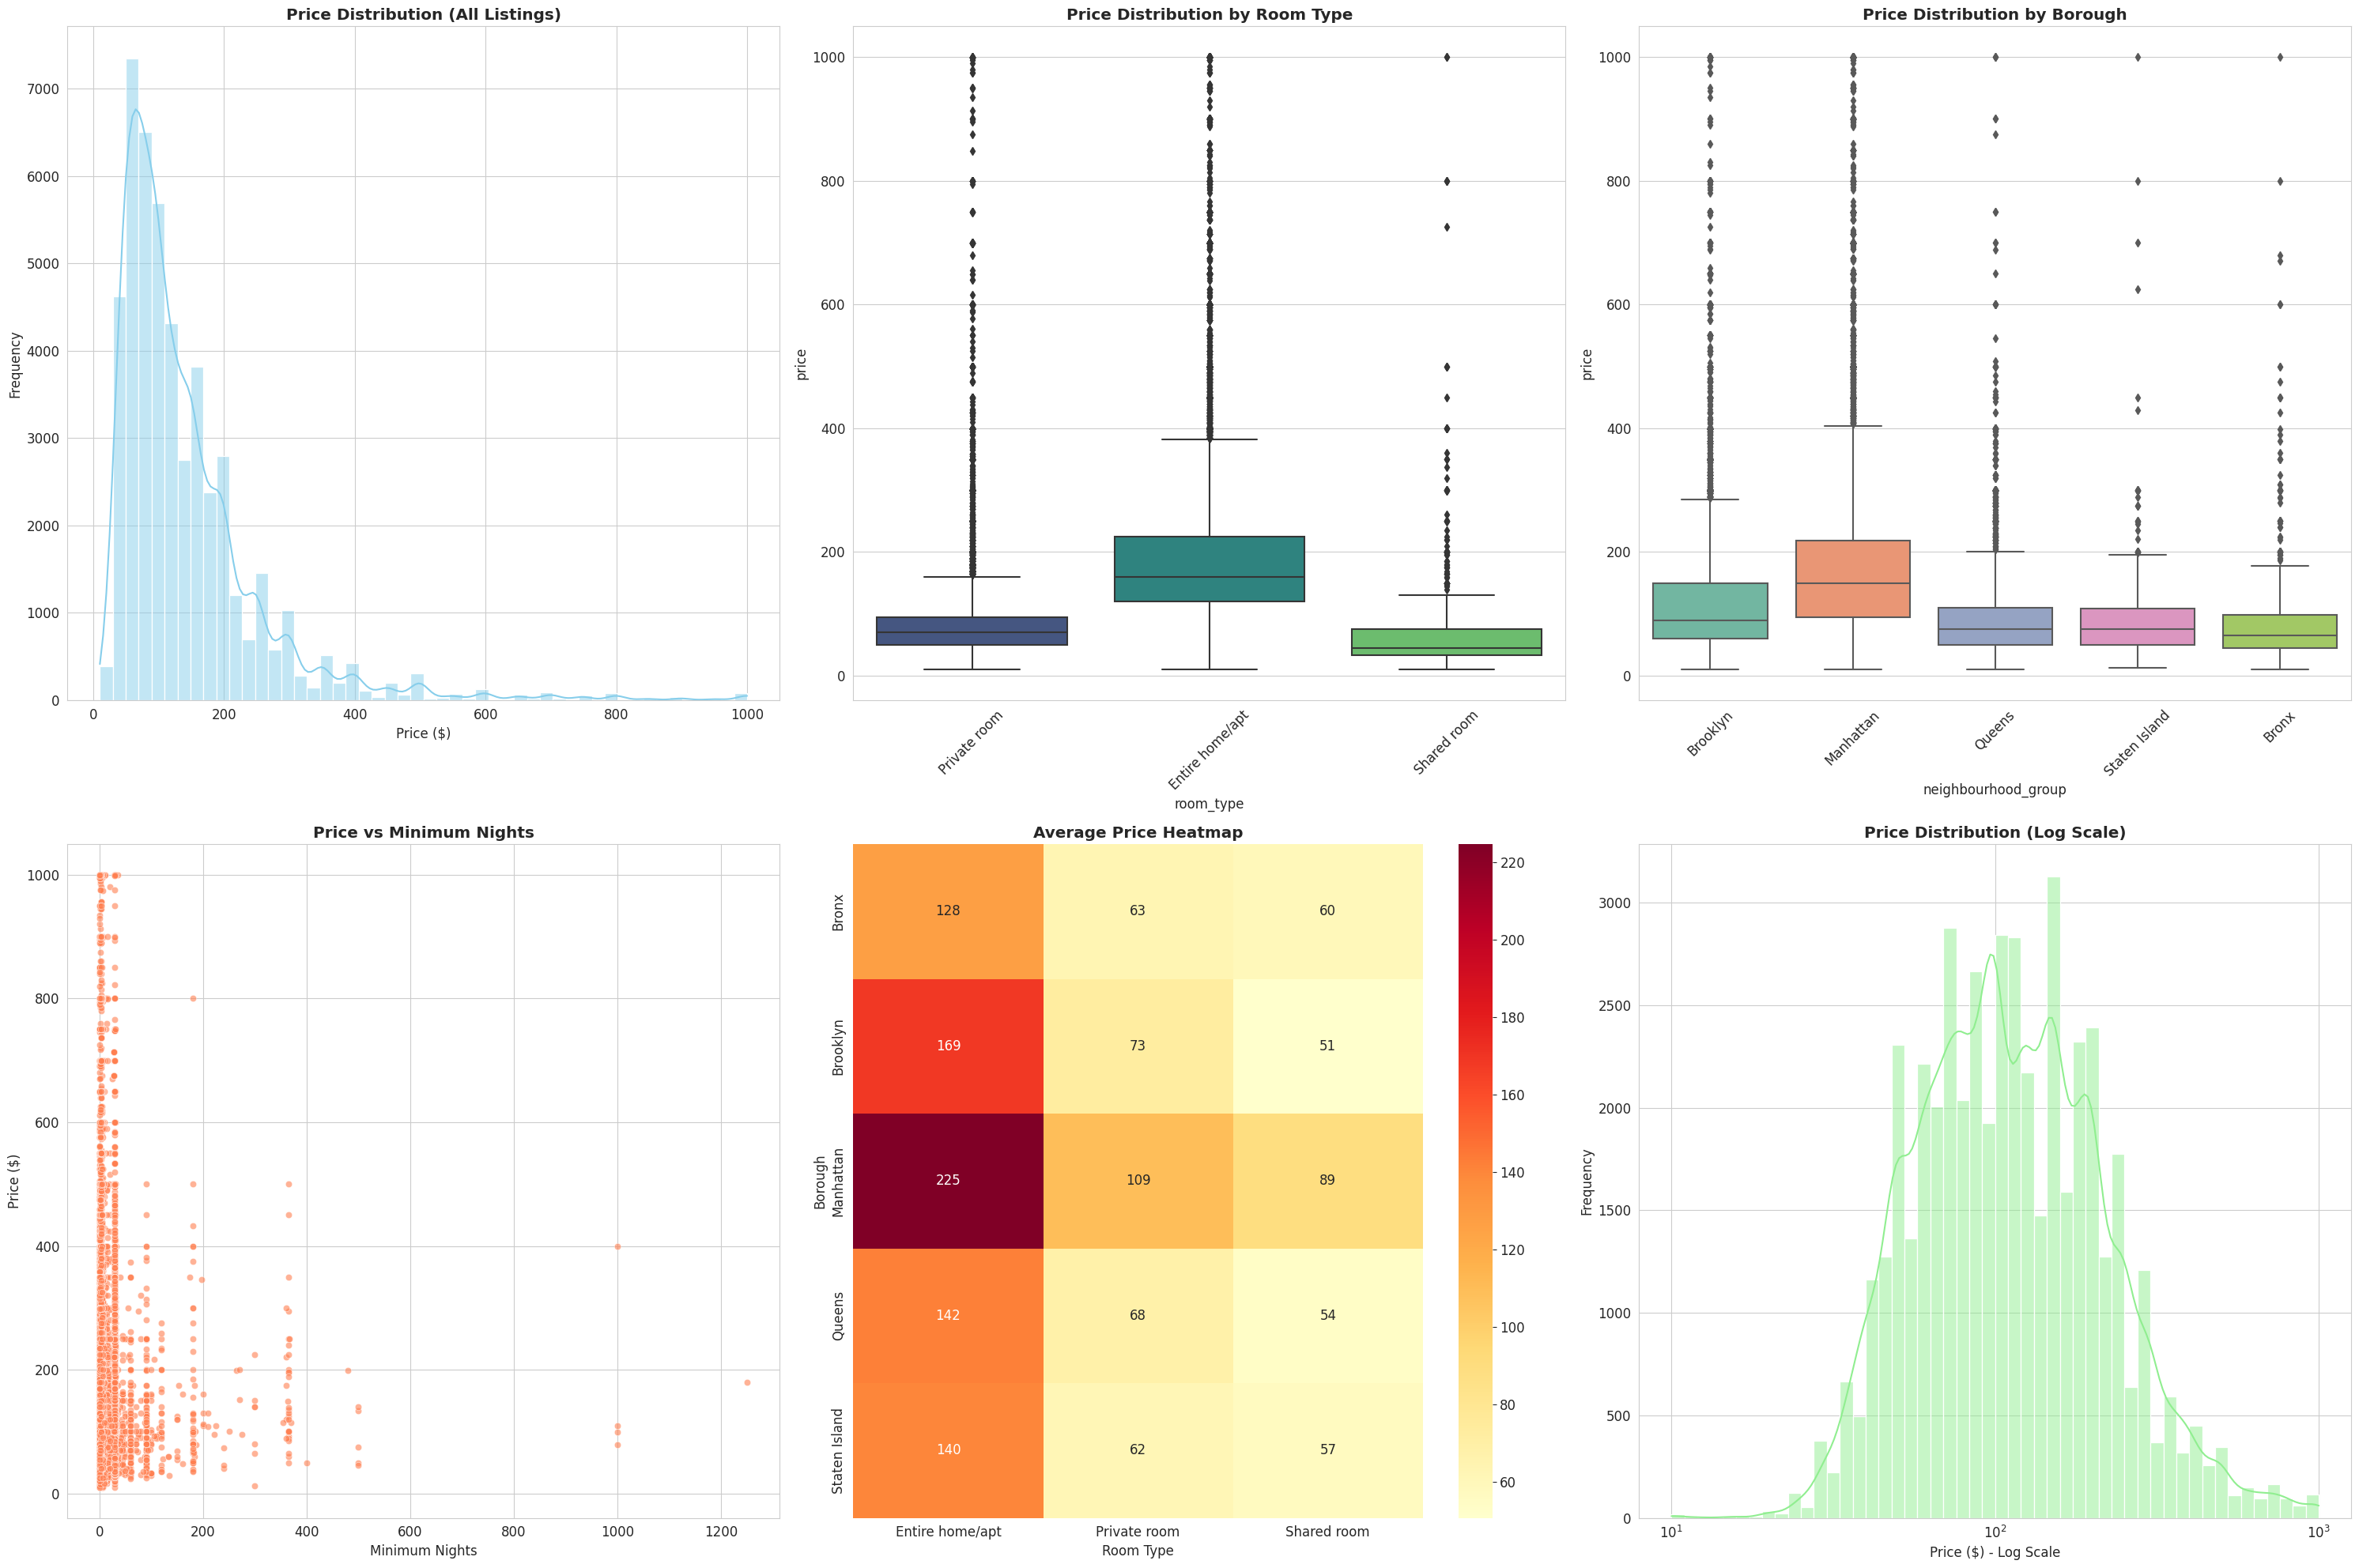


📈 Price Statistics Summary:
Mean price: $141.31
Median price: $105.00
Standard deviation: $116.73
Price range: $10.00 - $1000.00


In [6]:
analyze_price_distribution(df_clean)

## Geographical analysis

In [7]:
def analyze_geography(df):
    """Analyze geographical distribution of listings"""
    
    plt.figure(figsize=(20,15))
    
    # Subplot 1: Scatter plot of all listings
    plt.subplot(2, 3, 1)
    sns.scatterplot(data=df, x='longitude', y='latitude', 
                   hue='neighbourhood_group', alpha=0.6, s=20)
    plt.title('NYC Airbnb Listings by Borough', fontweight='bold')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Subplot 2: Price heatmap by location
    plt.subplot(2, 3, 2)
    plt.scatter(df['longitude'], df['latitude'], c=df['price'], 
               cmap='viridis', alpha=0.6, s=20)
    plt.colorbar(label='Price ($)')
    plt.title('Price Distribution Across NYC', fontweight='bold')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Subplot 3: Listings count by neighbourhood group
    plt.subplot(2, 3, 3)
    borough_counts = df['neighbourhood_group'].value_counts()
    sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='Set1')
    plt.title('Listings Count by Borough', fontweight='bold')
    plt.xlabel('Borough')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45)
    
    # Subplot 4: Average price by neighbourhood group
    plt.subplot(2, 3, 4)
    avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')
    plt.title('Average Price by Borough', fontweight='bold')
    plt.xlabel('Borough')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45)
    
    # Subplot 5: Room type distribution by borough
    plt.subplot(2, 3, 5)
    room_borough = pd.crosstab(df['neighbourhood_group'], df['room_type'])
    room_borough_pct = room_borough.div(room_borough.sum(axis=1), axis=0) * 100
    sns.heatmap(room_borough_pct, annot=True, cmap='Blues', fmt='.1f')
    plt.title('Room Type Distribution by Borough (%)', fontweight='bold')
    plt.xlabel('Room Type')
    plt.ylabel('Borough')
    
    # Subplot 6: Availability by borough
    plt.subplot(2, 3, 6)
    sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette='Set3')
    plt.title('Availability Distribution by Borough', fontweight='bold')
    plt.xlabel('Borough')
    plt.ylabel('Days Available per Year')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


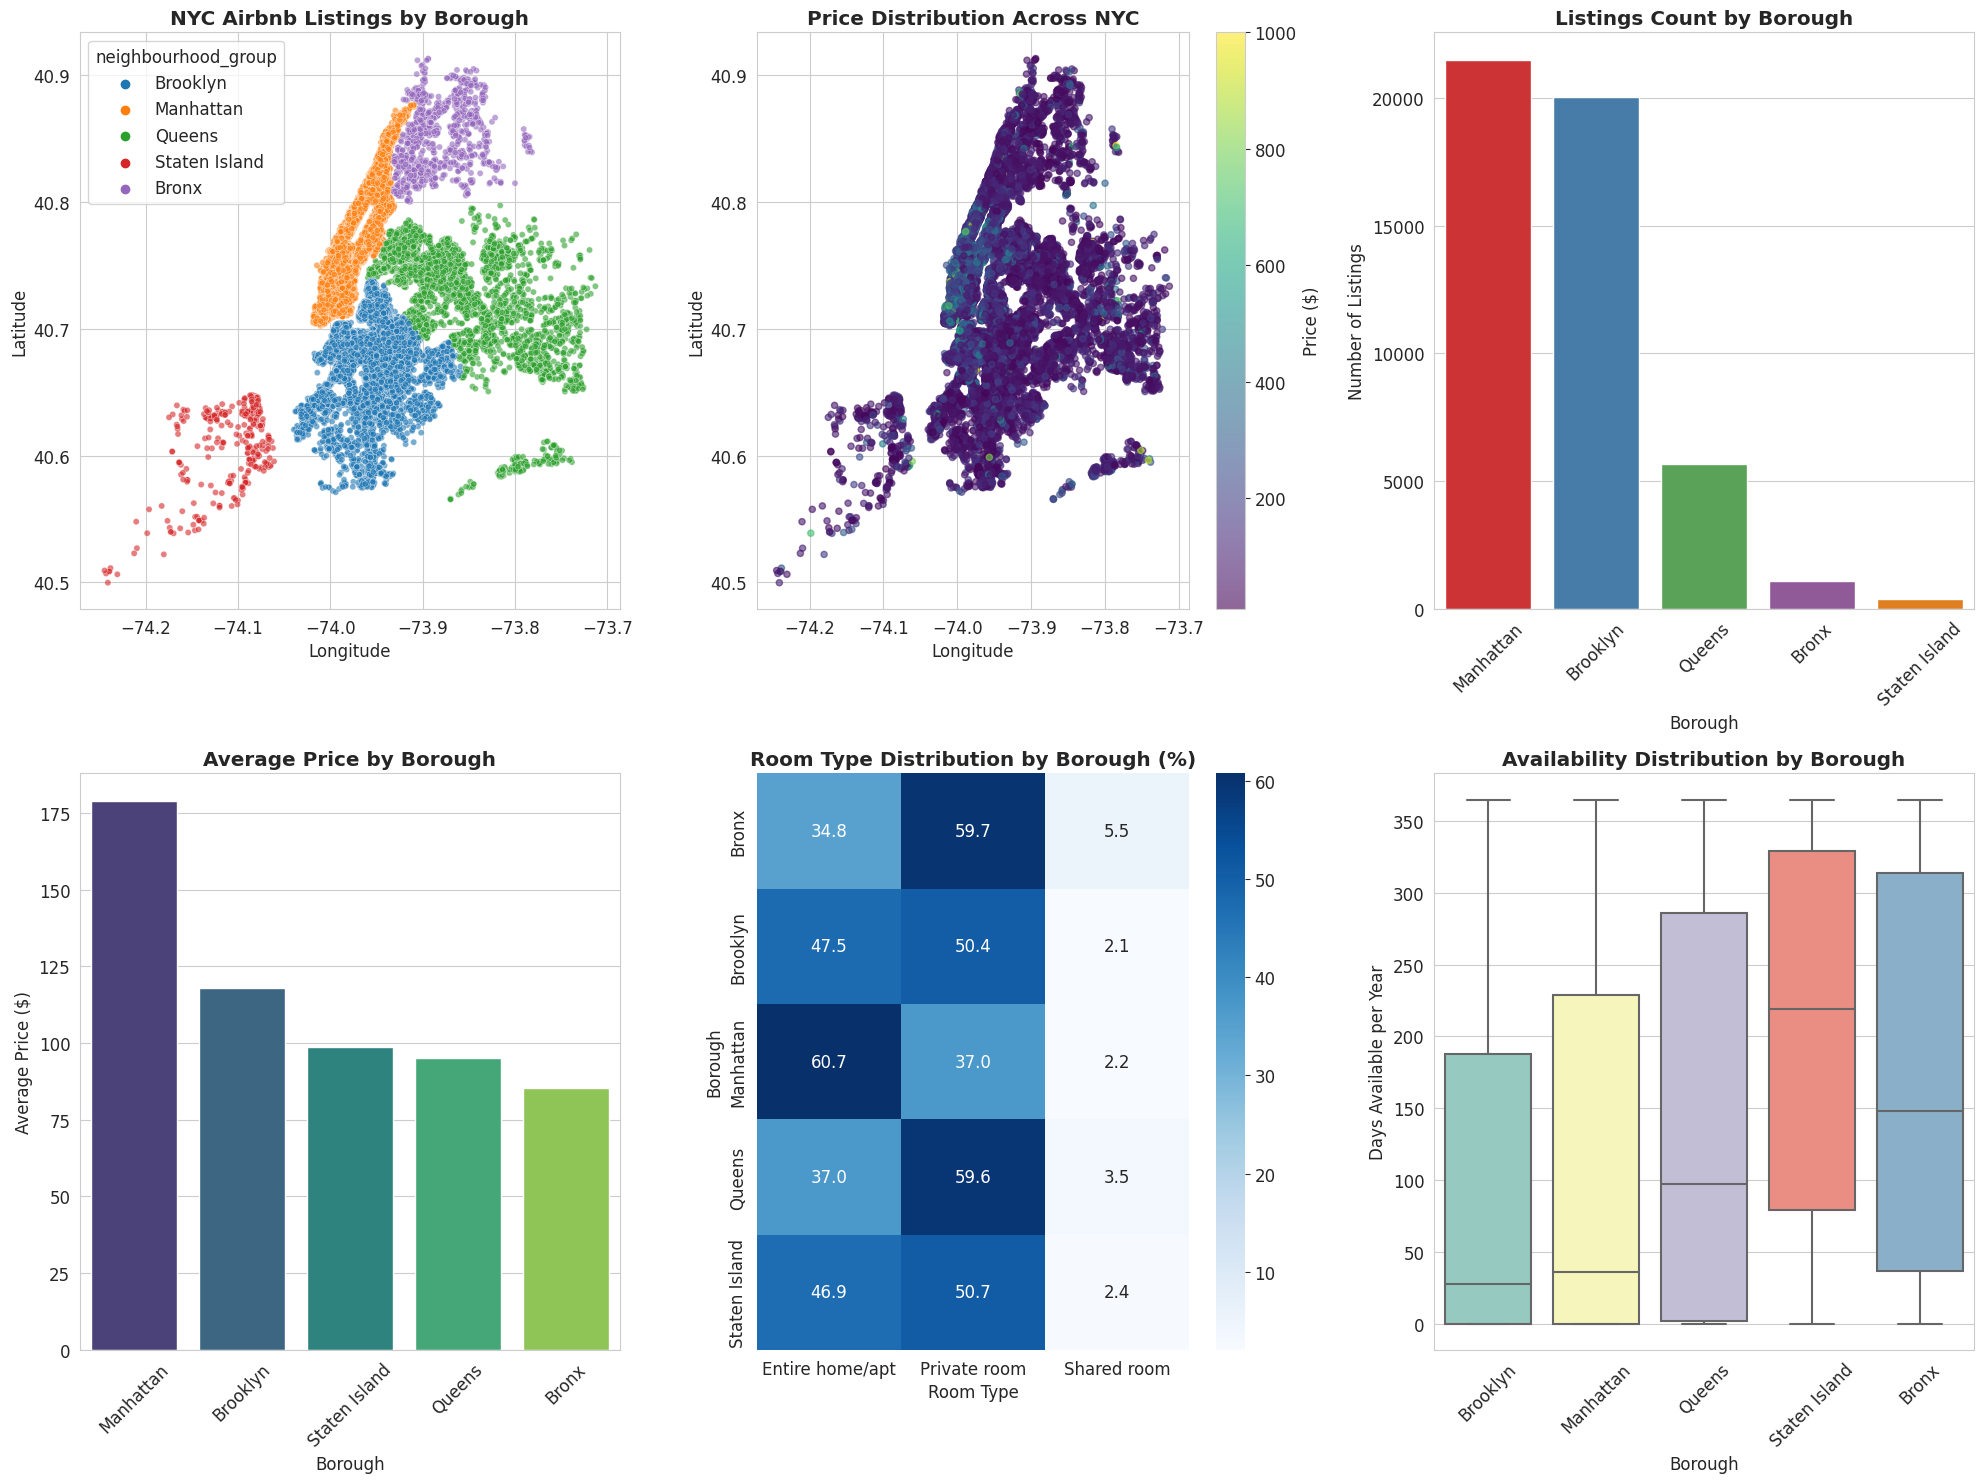

In [8]:
analyze_geography(df_clean)

## HOST ANALYSIS

In [9]:
def analyze_hosts(df):
    """Analyze host characteristics and their impact"""
    
    plt.figure(figsize=(20, 15))
    
    # Subplot 1: Host listings distribution
    plt.subplot(2, 3, 1)
    sns.histplot(data=df, x='calculated_host_listings_count', bins=50, kde=True, color='salmon')
    plt.title('Host Listings Count Distribution', fontweight='bold')
    plt.xlabel('Number of Listings per Host')
    plt.ylabel('Frequency')
    
    # Subplot 2: Price vs host listings count
    plt.subplot(2, 3, 2)
    sns.scatterplot(data=df, x='calculated_host_listings_count', y='price', alpha=0.6, color='teal')
    plt.title('Price vs Host Listings Count', fontweight='bold')
    plt.xlabel('Host Listings Count')
    plt.ylabel('Price ($)')
    
    # Subplot 3: Top hosts by number of listings
    plt.subplot(2, 3, 3)
    top_hosts = df.groupby('host_name')['id'].count().sort_values(ascending=False).head(10)
    sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='viridis')
    plt.title('Top 10 Hosts by Listings Count', fontweight='bold')
    plt.xlabel('Number of Listings')
    plt.ylabel('Host Name')
    
    # Subplot 4: Host type categorization
    plt.subplot(2, 3, 4)
    host_categories = pd.cut(df['calculated_host_listings_count'], 
                            bins=[0, 1, 3, 10, float('inf')], 
                            labels=['Single', 'Small (2-3)', 'Medium (4-10)', 'Large (10+)'])
    host_cat_counts = host_categories.value_counts()
    sns.barplot(x=host_cat_counts.index, y=host_cat_counts.values, palette='Set2')
    plt.title('Host Categories Distribution', fontweight='bold')
    plt.xlabel('Host Category')
    plt.ylabel('Number of Hosts')
    
    # Subplot 5: Average price by host category
    plt.subplot(2, 3, 5)
    df_temp = df.copy()
    df_temp['host_category'] = host_categories
    avg_price_by_host = df_temp.groupby('host_category')['price'].mean()
    sns.barplot(x=avg_price_by_host.index, y=avg_price_by_host.values, palette='coolwarm')
    plt.title('Average Price by Host Category', fontweight='bold')
    plt.xlabel('Host Category')
    plt.ylabel('Average Price ($)')
    
    # Subplot 6: Review patterns by host category
    plt.subplot(2, 3, 6)
    sns.boxplot(data=df_temp, x='host_category', y='number_of_reviews', palette='pastel')
    plt.title('Reviews Distribution by Host Category', fontweight='bold')
    plt.xlabel('Host Category')
    plt.ylabel('Number of Reviews')
    
    plt.tight_layout()
    plt.show()

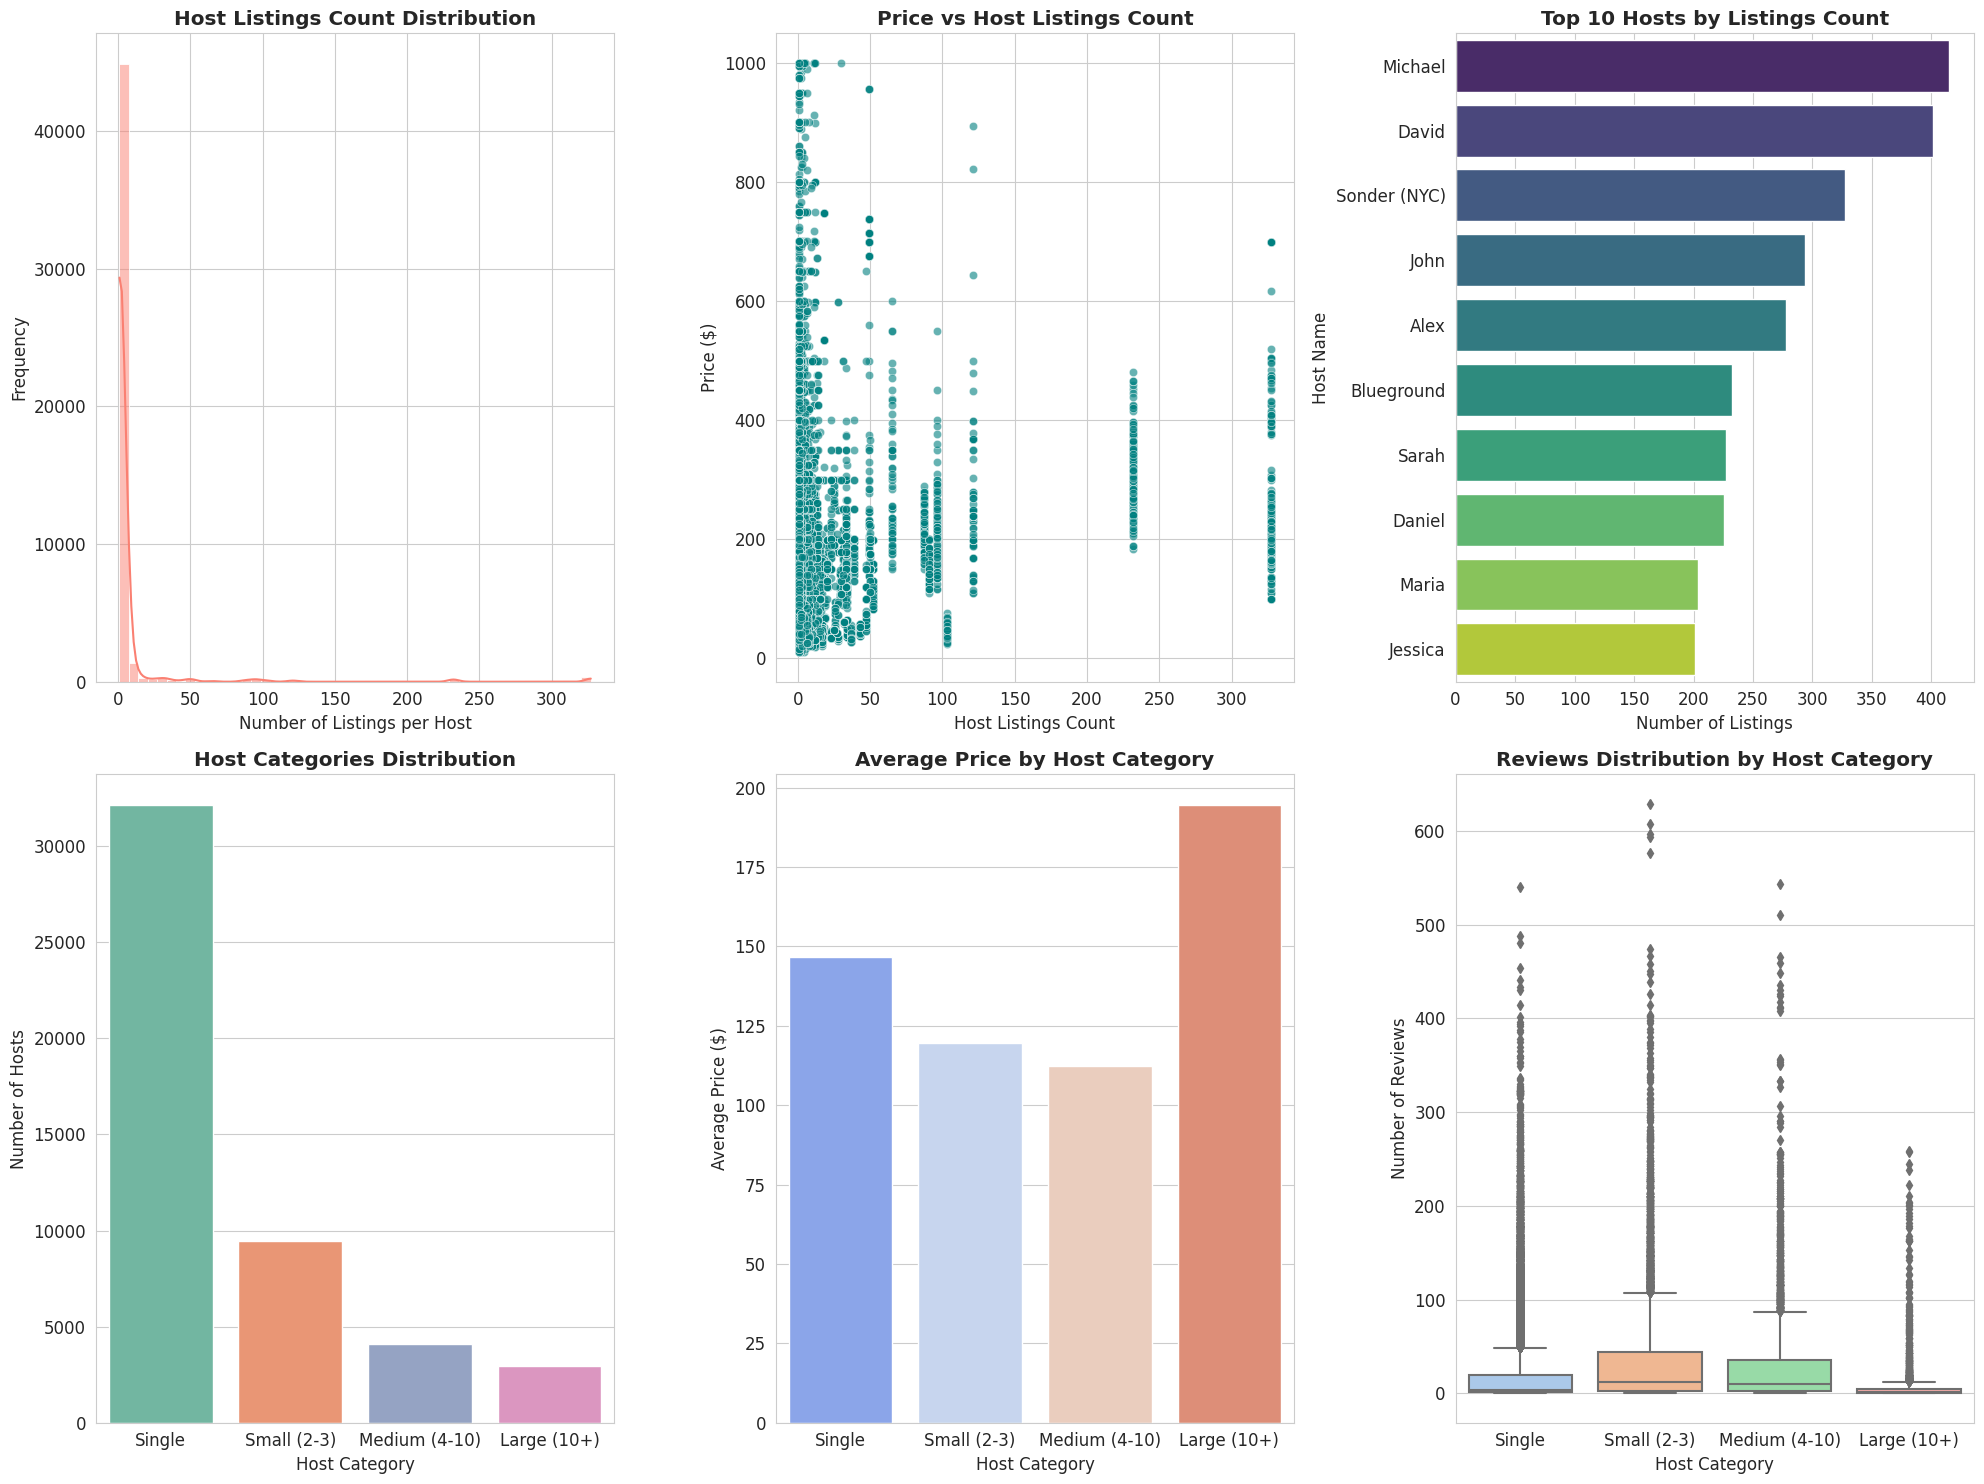

In [10]:
analyze_hosts(df_clean)

## Review analysis 

In [11]:
def analyze_reviews(df):
    """Analyze review patterns and their relationships"""
    
    plt.figure(figsize=(20, 15))
    
    # Subplot 1: Reviews distribution
    plt.subplot(2, 3, 1)
    sns.histplot(data=df, x='number_of_reviews', bins=50, kde=True, color='gold')
    plt.title('Number of Reviews Distribution', fontweight='bold')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Frequency')
    
    # Subplot 2: Reviews per month distribution
    plt.subplot(2, 3, 2)
    sns.histplot(data=df.dropna(subset=['reviews_per_month']), 
                 x='reviews_per_month', bins=30, kde=True, color='lightblue')
    plt.title('Reviews per Month Distribution', fontweight='bold')
    plt.xlabel('Reviews per Month')
    plt.ylabel('Frequency')
    
    # Subplot 3: Price vs number of reviews
    plt.subplot(2, 3, 3)
    sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.6, color='purple')
    plt.title('Price vs Number of Reviews', fontweight='bold')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Price ($)')
    
    # Subplot 4: Reviews by room type
    plt.subplot(2, 3, 4)
    sns.boxplot(data=df, x='room_type', y='number_of_reviews', palette='Set1')
    plt.title('Reviews Distribution by Room Type', fontweight='bold')
    plt.xlabel('Room Type')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    
    # Subplot 5: Reviews by borough
    plt.subplot(2, 3, 5)
    sns.boxplot(data=df, x='neighbourhood_group', y='number_of_reviews', palette='Set2')
    plt.title('Reviews Distribution by Borough', fontweight='bold')
    plt.xlabel('Borough')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    
    # Subplot 6: Last review timeline
    plt.subplot(2, 3, 6)
    df_with_reviews = df.dropna(subset=['last_review'])
    if not df_with_reviews.empty:
        df_with_reviews['last_review_year'] = df_with_reviews['last_review'].dt.year
        review_timeline = df_with_reviews['last_review_year'].value_counts().sort_index()
        sns.lineplot(x=review_timeline.index, y=review_timeline.values, marker='o', color='red')
        plt.title('Review Activity Timeline', fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

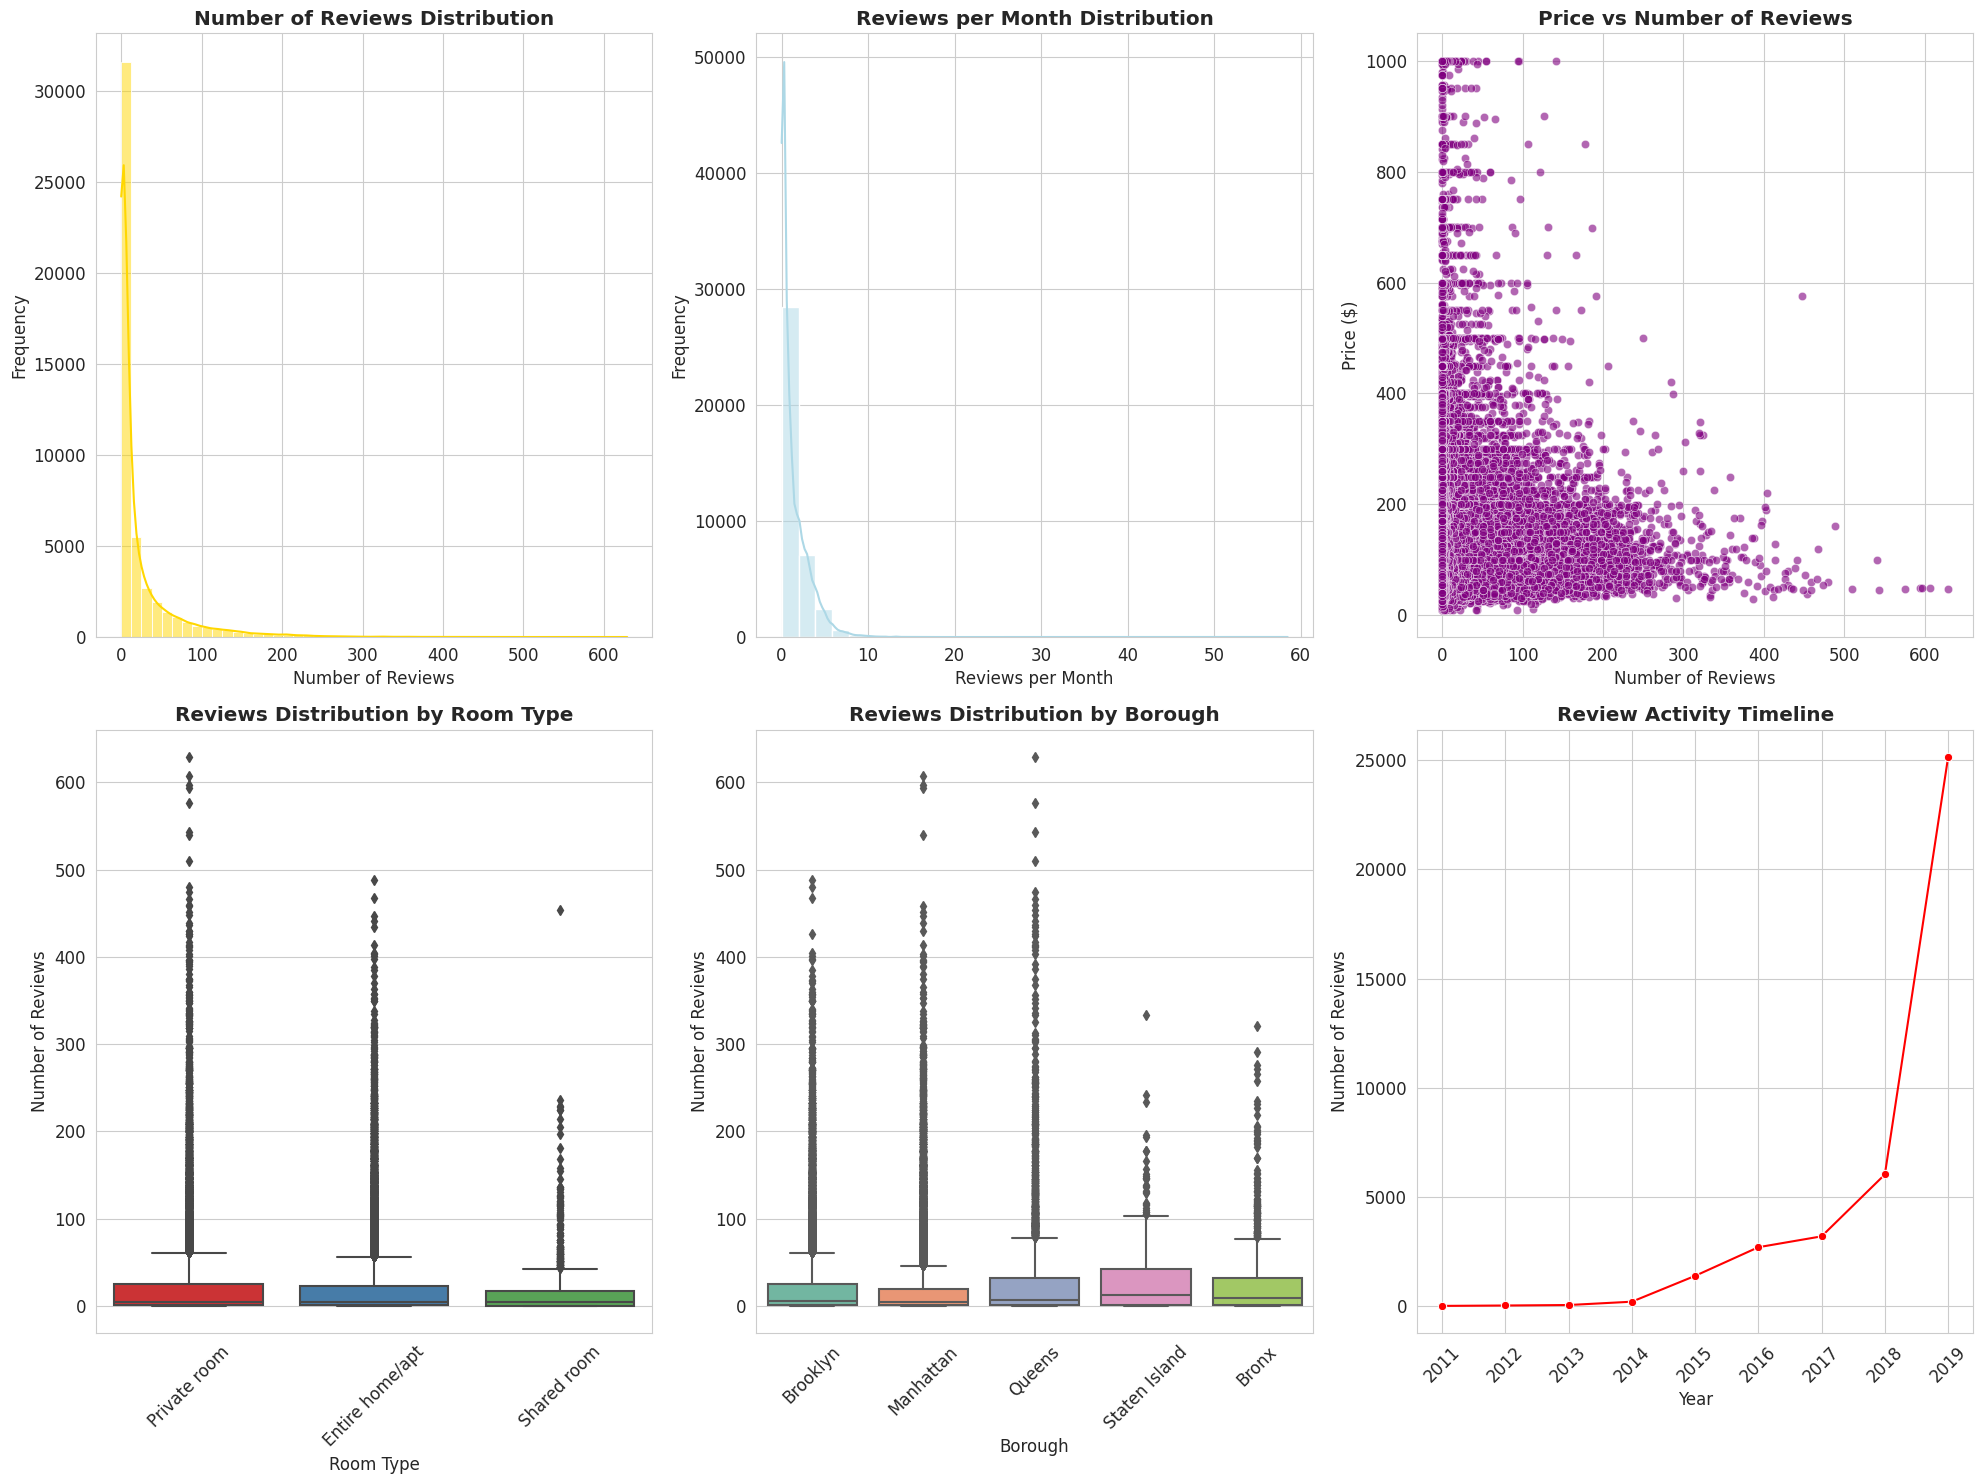

In [12]:
analyze_reviews(df_clean)

## Availability analysis

In [13]:
def analyze_availability(df):
    """Analyze availability patterns"""
    
    plt.figure(figsize=(20,10))
    
    # Subplot 1: Availability distribution
    plt.subplot(2, 3, 1)
    sns.histplot(data=df, x='availability_365', bins=30, kde=True, color='green')
    plt.title('Availability Distribution (Days per Year)', fontweight='bold')
    plt.xlabel('Days Available')
    plt.ylabel('Frequency')
    
    # Subplot 2: Price vs availability
    plt.subplot(2, 3, 2)
    sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.6, color='orange')
    plt.title('Price vs Availability', fontweight='bold')
    plt.xlabel('Days Available')
    plt.ylabel('Price ($)')
    
    # Subplot 3: Availability by room type
    plt.subplot(2, 3, 3)
    sns.boxplot(data=df, x='room_type', y='availability_365', palette='viridis')
    plt.title('Availability by Room Type', fontweight='bold')
    plt.xlabel('Room Type')
    plt.ylabel('Days Available')
    plt.xticks(rotation=45)
    
    # Subplot 4: Availability categories
    plt.subplot(2, 3, 4)
    availability_categories = pd.cut(df['availability_365'], 
                                   bins=[0, 50, 150, 300, 365], 
                                   labels=['Low (0-50)', 'Medium (51-150)', 'High (151-300)', 'Very High (301-365)'])
    avail_counts = availability_categories.value_counts()
    sns.barplot(x=avail_counts.index, y=avail_counts.values, palette='coolwarm')
    plt.title('Availability Categories', fontweight='bold')
    plt.xlabel('Availability Category')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45)
    
    # Subplot 5: Minimum nights distribution
    plt.subplot(2, 3, 5)
    sns.histplot(data=df[df['minimum_nights'] <= 30], x='minimum_nights', bins=30, kde=True, color='purple')
    plt.title('Minimum Nights Distribution', fontweight='bold')
    plt.xlabel('Minimum Nights')
    plt.ylabel('Frequency')
    
    # Subplot 6: Minimum nights by borough
    plt.subplot(2, 3, 6)
    sns.boxplot(data=df[df['minimum_nights'] <= 30], x='neighbourhood_group', y='minimum_nights', palette='Set3')
    plt.title('Minimum Nights by Borough', fontweight='bold')
    plt.xlabel('Borough')
    plt.ylabel('Minimum Nights')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

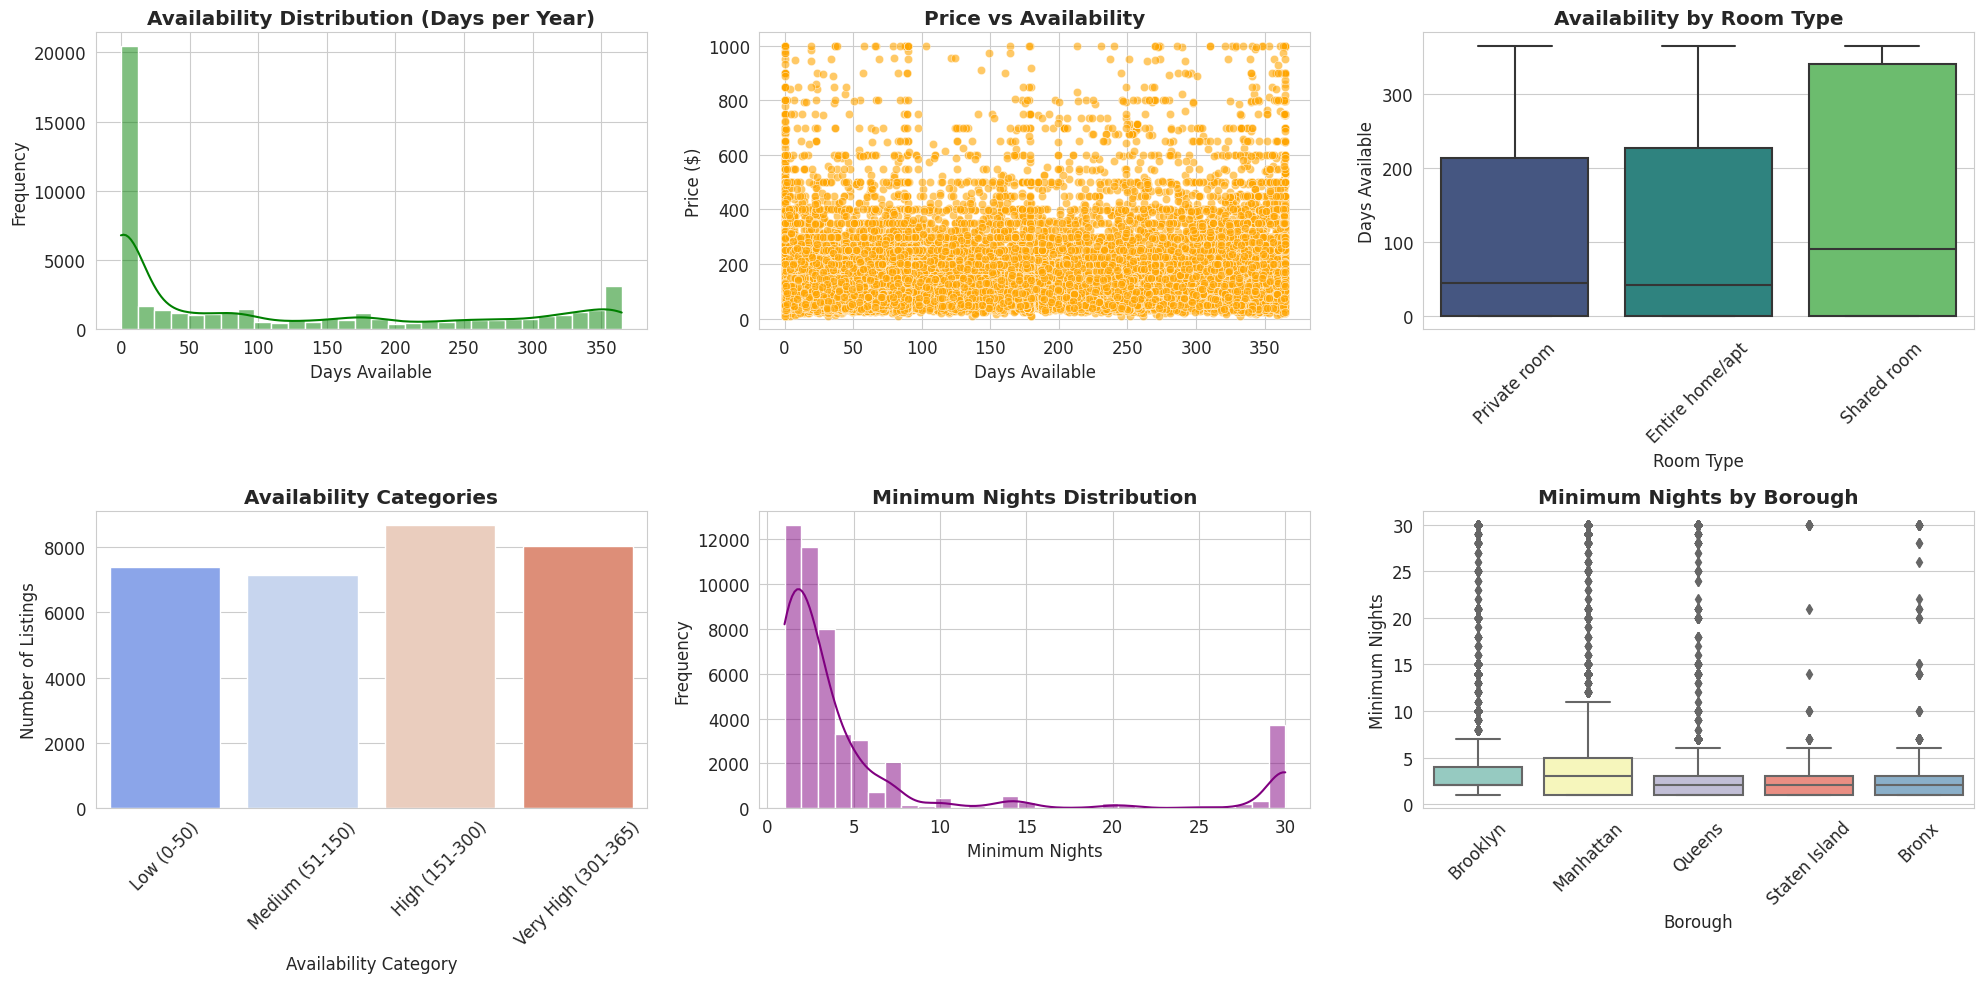

In [14]:
analyze_availability(df_clean)

## Correlation anlysis

In [15]:
def analyze_correlations(df):
    """Analyze correlations between numerical variables"""
    
    # Select numerical columns for correlation analysis
    numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 
                     'reviews_per_month', 'calculated_host_listings_count', 
                     'availability_365', 'latitude', 'longitude']
    
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(12, 10))
    
    # Create correlation heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix - Numerical Variables', fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print strongest correlations
    print("\n🔍 Strongest Correlations:")
    correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                               corr_matrix.iloc[i, j]))
    
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    for var1, var2, corr in correlations[:10]:
        print(f"{var1} ↔ {var2}: {corr:.3f}")

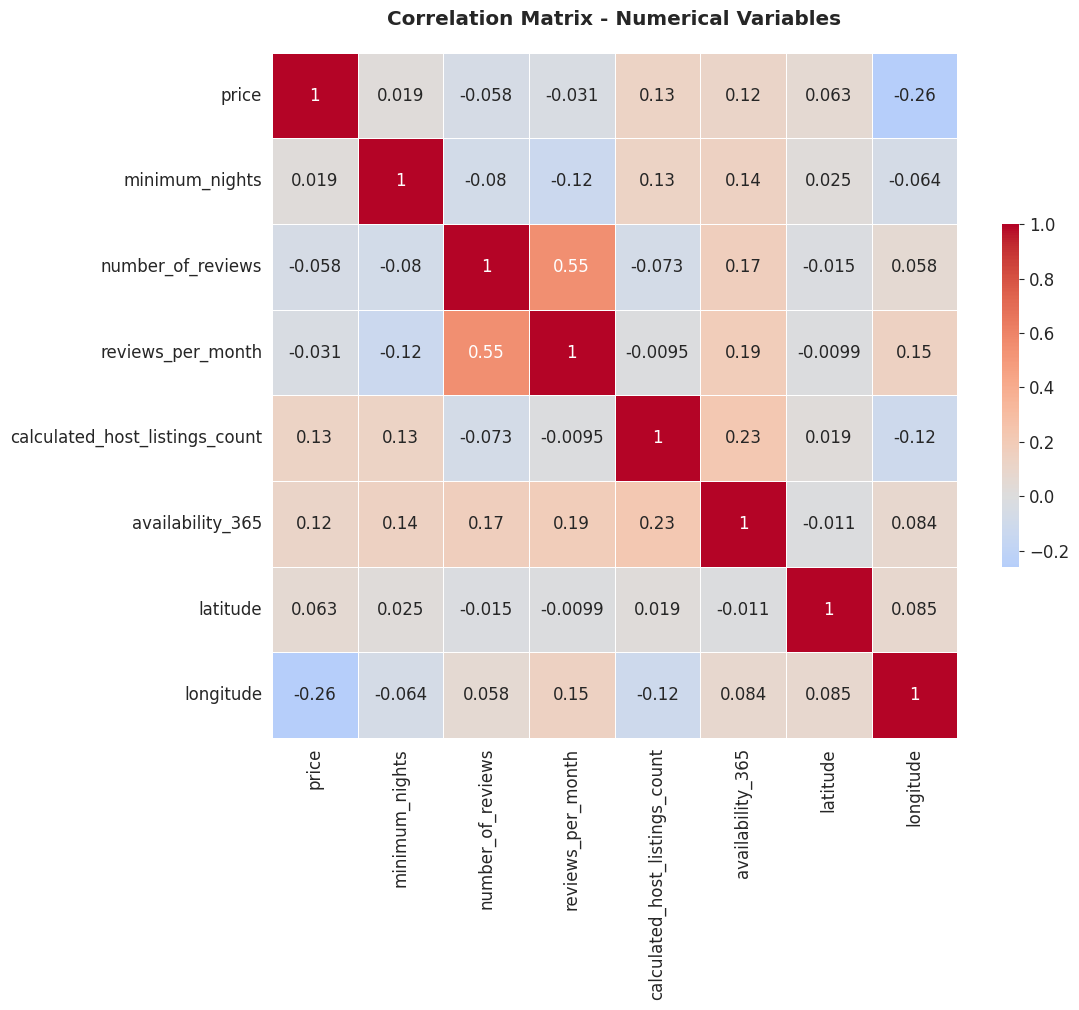


🔍 Strongest Correlations:
number_of_reviews ↔ reviews_per_month: 0.550
price ↔ longitude: -0.259
calculated_host_listings_count ↔ availability_365: 0.227
reviews_per_month ↔ availability_365: 0.187
number_of_reviews ↔ availability_365: 0.174
reviews_per_month ↔ longitude: 0.145
minimum_nights ↔ availability_365: 0.144
price ↔ calculated_host_listings_count: 0.131
minimum_nights ↔ calculated_host_listings_count: 0.130
minimum_nights ↔ reviews_per_month: -0.122


In [16]:
analyze_correlations(df_clean)

## Business insights

In [17]:
def generate_insights(df):
    """Generate business insights from the analysis"""
    
    print("🎯 Key Business Insights:")
    print("=" * 50)
    
    # Price insights
    median_price = df['price'].median()
    most_expensive_borough = df.groupby('neighbourhood_group')['price'].mean().idxmax()
    most_affordable_borough = df.groupby('neighbourhood_group')['price'].mean().idxmin()
    
    print(f"\n💰 PRICING INSIGHTS:")
    print(f"   • Median listing price: ${median_price:.2f}")
    print(f"   • Most expensive borough: {most_expensive_borough}")
    print(f"   • Most affordable borough: {most_affordable_borough}")
    
    # Room type insights
    popular_room_type = df['room_type'].value_counts().index[0]
    print(f"\n🏠 ROOM TYPE INSIGHTS:")
    print(f"   • Most popular room type: {popular_room_type}")
    print(f"   • Room type distribution:")
    for room_type, count in df['room_type'].value_counts().items():
        percentage = (count / len(df)) * 100
        print(f"     - {room_type}: {count:,} listings ({percentage:.1f}%)")
    
    # Host insights
    superhosts = df[df['calculated_host_listings_count'] >= 10]
    print(f"\n👤 HOST INSIGHTS:")
    print(f"   • Superhosts (10+ listings): {len(superhosts):,} ({len(superhosts)/len(df)*100:.1f}%)")
    print(f"   • Average listings per host: {df['calculated_host_listings_count'].mean():.1f}")
    
    # Geographic insights
    most_listings_borough = df['neighbourhood_group'].value_counts().index[0]
    print(f"\n🗺️ GEOGRAPHIC INSIGHTS:")
    print(f"   • Borough with most listings: {most_listings_borough}")
    print(f"   • Borough distribution:")
    for borough, count in df['neighbourhood_group'].value_counts().items():
        percentage = (count / len(df)) * 100
        print(f"     - {borough}: {count:,} listings ({percentage:.1f}%)")
    
    # Availability insights
    high_availability = df[df['availability_365'] > 300]
    print(f"\n📅 AVAILABILITY INSIGHTS:")
    print(f"   • High availability listings (300+ days): {len(high_availability):,} ({len(high_availability)/len(df)*100:.1f}%)")
    print(f"   • Average availability: {df['availability_365'].mean():.0f} days per year")


generate_insights(df_clean)

🎯 Key Business Insights:

💰 PRICING INSIGHTS:
   • Median listing price: $105.00
   • Most expensive borough: Manhattan
   • Most affordable borough: Bronx

🏠 ROOM TYPE INSIGHTS:
   • Most popular room type: Entire home/apt
   • Room type distribution:
     - Entire home/apt: 25,216 listings (51.8%)
     - Private room: 22,273 listings (45.8%)
     - Shared room: 1,156 listings (2.4%)

👤 HOST INSIGHTS:
   • Superhosts (10+ listings): 3,153 (6.5%)
   • Average listings per host: 7.2

🗺️ GEOGRAPHIC INSIGHTS:
   • Borough with most listings: Manhattan
   • Borough distribution:
     - Manhattan: 21,488 listings (44.2%)
     - Brooklyn: 20,041 listings (41.2%)
     - Queens: 5,656 listings (11.6%)
     - Bronx: 1,089 listings (2.2%)
     - Staten Island: 371 listings (0.8%)

📅 AVAILABILITY INSIGHTS:
   • High availability listings (300+ days): 8,023 (16.5%)
   • Average availability: 112 days per year
